## Extreme Gradient Boosting

In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import data_processing
import feature_extraction

In [2]:
df = data_processing.read_all_users('geolife_trajectories')

[1/182] processing user 135
[2/182] processing user 132
[3/182] processing user 104
[4/182] processing user 103
[5/182] processing user 168
[6/182] processing user 157
[7/182] processing user 150
[8/182] processing user 159
[9/182] processing user 166
[10/182] processing user 161
[11/182] processing user 102
[12/182] processing user 105
[13/182] processing user 133
[14/182] processing user 134
[15/182] processing user 160
[16/182] processing user 158
[17/182] processing user 167
[18/182] processing user 151
[19/182] processing user 169
[20/182] processing user 156
[21/182] processing user 024
[22/182] processing user 023
[23/182] processing user 015
[24/182] processing user 012
[25/182] processing user 079
[26/182] processing user 046
[27/182] processing user 041
[28/182] processing user 048
[29/182] processing user 077
[30/182] processing user 083
[31/182] processing user 084
[32/182] processing user 070
[33/182] processing user 013
[34/182] processing user 014
[35/182] processing use

In [3]:
df = data_processing.process_classes(df)
df = data_processing.drop_unlabelled(df)

In [4]:
df = data_processing.create_segments(df)
df = data_processing.calculations(df)
df = data_processing.filter(df)

In [5]:
feature_df = feature_extraction.extract_features(df)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [6]:
feature_df

,label,segment,trajectory,start_time,segment_length,total_distance,duration,mean_speed,expected_speed,top_1_speed,...,acceleration_std,HCR,SR,VCR,speed_skewness,acc_skewness,speed_kurtosis,acceleration_kurtosis,speed_autocorr,acc_autocorr
segment,,,,,,,,,,,,,,,,,,,,,
3,bike,3,20070412102116.plt,10,4,0.068010,0.064722,1.050798,1.343233,3.874367,...,0.081758,0.750000,0.750000,0.500000,1.979491,1.793881,3.928617,3.202047,-0.489260,-0.515084
4,bike,4,20070412102116.plt,14,44,2.523296,0.283056,8.914491,10.285131,26.514408,...,1.068693,0.386364,0.045455,0.068182,0.411348,5.777476,4.893587,35.905581,0.139960,-0.305496
8,bike,8,20070412134621.plt,14,22,2.244391,0.150833,14.879941,14.386680,16.278984,...,0.062032,0.181818,0.000000,0.000000,-1.904818,-0.606119,4.683206,1.055243,0.240081,-0.299067
9,bike,9,20070413005306.plt,0,38,2.051800,0.178611,11.487525,12.047576,19.428250,...,0.236898,0.447368,0.000000,0.000000,0.198838,1.306978,0.499834,2.333092,0.343581,-0.327417
10,car,10,20070413005306.plt,5,28,1.744181,0.109444,15.936682,25.946064,45.033945,...,1.412320,0.214286,0.000000,0.107143,-0.276824,0.488532,-0.916586,-0.054814,0.258793,-0.178507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,walk,25129,20111231075505.plt,8,87,0.663581,0.152778,4.343439,4.426357,22.285273,...,0.686471,0.574713,0.091954,0.068966,1.945087,-0.389536,6.503679,1.644895,0.511507,-0.055969
25130,walk,25130,20111231144437.plt,14,67,0.453766,0.091667,4.950173,4.898091,12.276887,...,0.449715,0.507463,0.029851,0.000000,0.385842,-0.469497,0.538724,3.110229,0.580192,-0.396046
25131,walk,25131,20111231144437.plt,14,4,0.015887,0.004167,3.812961,2.974794,6.219806,...,0.301281,1.000000,0.250000,0.000000,1.247159,0.766909,2.305851,1.508225,0.077268,0.127436


Encode labels

In [7]:
encoder = LabelEncoder()
feature_df['label'] = encoder.fit_transform(feature_df['label'])  # Encodes labels into numbers

Train/Test

In [8]:
# Define the columns to drop
columns_to_drop = ['label', 'trajectory','segment']

In [9]:
# Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(feature_df, test_size=0.2, random_state=19)

In [10]:
# Separate features and target for the training set
X_train = train_df.drop(columns=columns_to_drop)
y_train = train_df['label']

# Separate features and target for the testing set
X_test = test_df.drop(columns=columns_to_drop)
y_test = test_df['label']

Model

In [ ]:
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax", 
    num_class=5,  
    eval_metric="mlogloss",  
    #scale_pos_weight=scale_pos_weight,  
    n_estimators=100,  # Number of trees
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)


Train the model

In [12]:
# Train model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

Predict the testset

In [13]:
y_pred = xgb_model.predict(X_test)

Evaluate

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.839626033800791
Classification Report:
               precision    recall  f1-score   support

           0      0.876     0.826     0.851       386
           1      0.780     0.700     0.738       543
           2      0.749     0.709     0.728       412
           3      0.892     0.682     0.773       267
           4      0.870     0.991     0.926      1173

    accuracy                          0.840      2781
   macro avg      0.833     0.781     0.803      2781
weighted avg      0.837     0.840     0.835      2781

Confusion Matrix:
 [[ 319   20    8    0   39]
 [  26  380   68   13   56]
 [  13   56  292    8   43]
 [   2   29   18  182   36]
 [   4    2    4    1 1162]]


# Tune Hyperparamters using gridsearch

Set parmaters to search

In [15]:
param_grid = {
    "n_estimators": [80, 100, 120],  # Number of boosting rounds
    "learning_rate": [0.01,0.05, 0.1, 0.15],  # Lower values prevent overfitting
    "max_depth": [5, 6, 7],  # Complexity of trees
    "min_child_weight": [1, 3, 5],  # Minimum sum of weights in a child node
    "subsample": [0.8, 1.0],  # Fraction of training samples used
    "colsample_bytree": [0.7,0.8, 1.0],  # Fraction of features used per tree
}

In [16]:
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax", 
    num_class=5,  # Set the number of classes for multi-class
    eval_metric="mlogloss",  # Use "logloss" for binary classification
    #scale_pos_weight=scale_pos_weight,  # Adjust weight for imbalance
    n_estimators=100,  # Number of trees
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

In [17]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPUs
)

In [18]:
# Perform GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total tim

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_class=5,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [5, 6, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [80, 100, 120],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [101]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 120, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8405579153279971


In [19]:
best_params = grid_search.best_params_

best_xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",  
    num_class=5,  
    eval_metric="mlogloss",  
    random_state=36,
    
    **best_params  # Use best hyperparameters
)

best_xgb_model.fit(X_train, y_train)

# Predictions
y_pred = best_xgb_model.predict(X_test)


# Decode labels back to original transport mode names
#y_test = encoder.inverse_transform(y_test)
#y_pred = encoder.inverse_transform(y_pred)

# Evaluate model
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred,target_names=encoder.classes_,digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Accuracy: 0.8460985257101762
Classification Report:
               precision    recall  f1-score   support

        bike      0.885     0.837     0.860       386
         bus      0.793     0.700     0.744       543
         car      0.746     0.718     0.732       412
       train      0.903     0.700     0.789       267
        walk      0.875     0.995     0.931      1173

    accuracy                          0.846      2781
   macro avg      0.841     0.790     0.811      2781
weighted avg      0.844     0.846     0.842      2781

Confusion Matrix:
 [[ 323   22    9    0   32]
 [  25  380   72   10   56]
 [  12   53  296    9   42]
 [   3   23   18  187   36]
 [   2    1    2    1 1167]]



Confusion Matrix (% of True Labels):


,Pred bike,Pred bus,Pred car,Pred train,Pred walk
True bike,83.7%,5.7%,2.3%,0.0%,8.3%
True bus,4.6%,70.0%,13.3%,1.8%,10.3%
True car,2.9%,12.9%,71.8%,2.2%,10.2%
True train,1.1%,8.6%,6.7%,70.0%,13.5%
True walk,0.2%,0.1%,0.2%,0.1%,99.5%


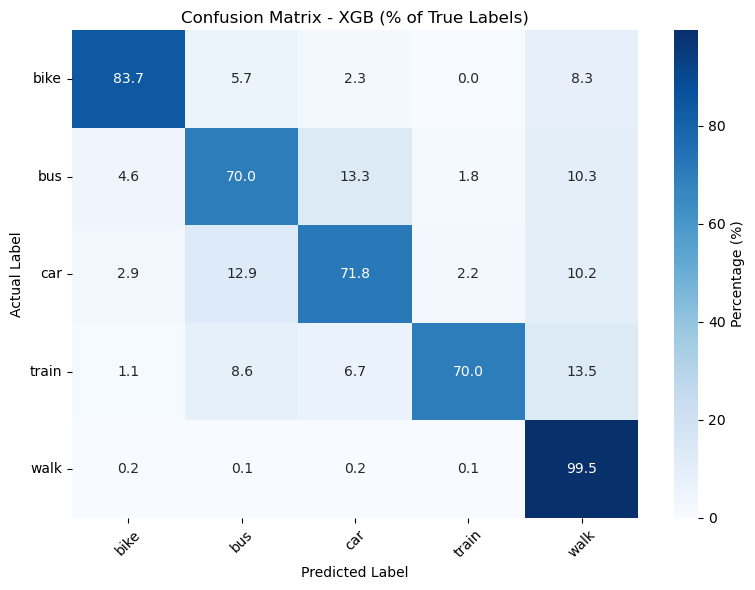

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Normalize by true labels

# Create labeled DataFrame
class_names = encoder.classes_
cm_df = pd.DataFrame(cm_percent, 
                    index=[f"True {name}" for name in class_names],
                    columns=[f"Pred {name}" for name in class_names])

print("\nConfusion Matrix (% of True Labels):")
display(cm_df.style.format("{:.1f}%").set_caption("Confusion Matrix (Percentage of True Labels)"))

# Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="Blues",
           xticklabels=class_names, yticklabels=class_names,
           cbar_kws={'label': 'Percentage (%)'})
plt.title("Confusion Matrix - XGB (% of True Labels)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("XGB_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

Plotting the performance on the test set

Real labels

In [21]:

# First, create a mapping dictionary from segment to label from unlabelled_feature_df
segment_label_map = test_df.set_index('segment')['label'].to_dict()

# Then map the labels to unlabeled_df using the new_segment column
df['real_label'] = df['segment'].map(segment_label_map)

# Fill any NaN values (unmatched segments) with 10
full_test_df = df
full_test_df['real_label'] = full_test_df['real_label'].fillna(10).astype(int)  # Convert to int if needed
full_test_df = full_test_df[full_test_df['real_label'] != 10]
full_test_df['real_label'] = encoder.inverse_transform(full_test_df['real_label'])  # Decode labels back to original transport mode names

/var/folders/6q/9kdss80974ldrx7hy_83wyn00000gn/T/ipykernel_1286/2333318985.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_test_df['real_label'] = encoder.inverse_transform(full_test_df['real_label'])  # Decode labels back to original transport mode names


In [107]:
segments = full_test_df.groupby('segment')

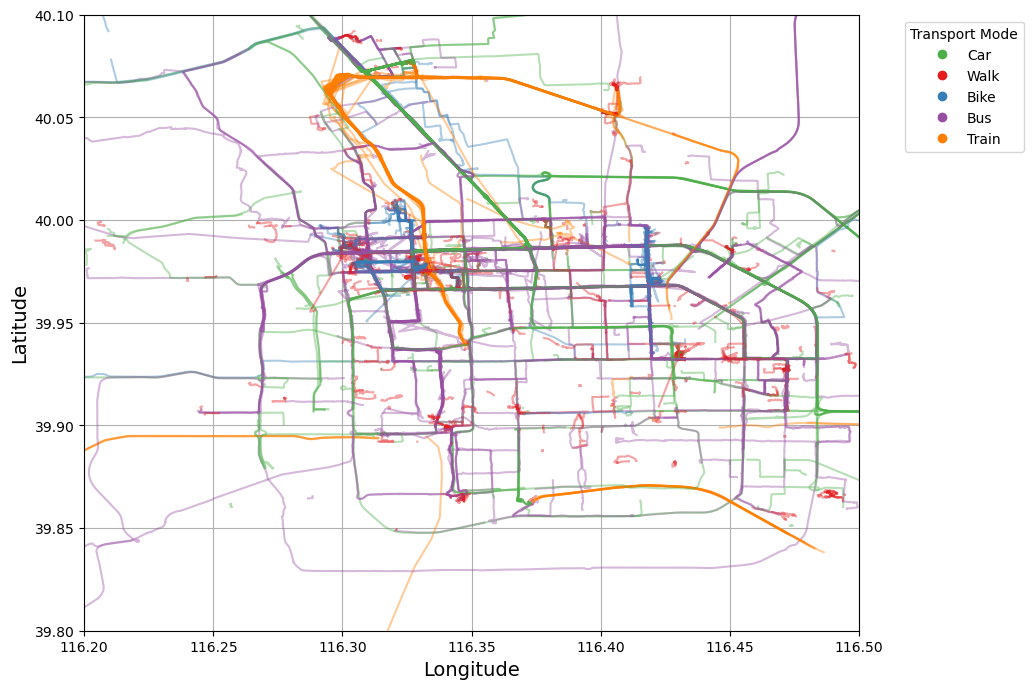

In [ ]:
# Define an improved color map with distinct, visually appealing colors
# Get Seaborn's Set2 palette (8 colors)
color_palette = sns.color_palette("Set1", 8)

# Assign transport modes to colors
color_map = {
    'walk': color_palette[0],   # Soft Green
    'bike': color_palette[1],   # Light Orange
    'car': color_palette[2],    # Light Blue
    'bus': color_palette[3],    # Light Purple
    'train': color_palette[4],  # Teal
    '0': color_palette[5]         # Default for missing labels
}
plt.figure(figsize=(10, 8))
#plt.title("Geolife Trajectories by Transport Mode", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.xlim(116.2, 116.5)  # Longitude limits
plt.ylim(39.8, 40.1)  # Latitude limits

# Track unique transport modes for legend
unique_labels = set()

# Iterate over each segment and plot it with the corresponding color
for name, group in segments:
    transport_mode = group['label'].iloc[0]  
    color = color_map.get(transport_mode, 'black')  
    plt.plot(group['lon'], group['lat'],color=color, alpha=0.4)
    unique_labels.add(transport_mode)  # Collect unique transport modes for legend

#Custim Legend
handles = []
labels = []
for label in unique_labels:
    # Replace '0' with "Unlabeled" in legend
    display_label = "Unlabeled" if str(label) == '0' else str(label).capitalize()
    handles.append(plt.Line2D([0], [0], 
                    color=color_map.get(str(label), 'gray'), 
                    lw=2,
                    marker='o',
                    linestyle='None'))
    labels.append(display_label)

plt.legend(handles, labels, 
           title="Transport Mode", 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           fontsize=10)

#plt.tight_layout()
plt.grid()

# Save the plot
plt.savefig("Graphs/xgboost_test_reallabel.png", dpi=500, bbox_inches="tight")
#plt.savefig(save_path, dpi=600, format="png", bbox_inches="tight", transparent=True)
# Show the plot
plt.show()

Plot the Predictions

In [22]:
test_df['predicted_label'] = y_pred
# First, create a mapping dictionary from segment to label from unlabelled_feature_df
segment_label_map = test_df.set_index('segment')['predicted_label'].to_dict()

# Then map the labels to unlabeled_df using the new_segment column
full_test_df['predicted_label'] = full_test_df['segment'].map(segment_label_map)
full_test_df['predicted_label'] = encoder.inverse_transform(full_test_df['predicted_label'])  # Decode labels back to original transport mode names

/var/folders/6q/9kdss80974ldrx7hy_83wyn00000gn/T/ipykernel_1286/338796121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_test_df['predicted_label'] = full_test_df['segment'].map(segment_label_map)
/var/folders/6q/9kdss80974ldrx7hy_83wyn00000gn/T/ipykernel_1286/338796121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_test_df['predicted_label'] = encoder.inverse_transform(full_test_df['predicted_label'])  # Decode labels back to original transport mode names


In [110]:
segments = full_test_df.groupby('segment')

In [113]:
full_test_df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,...,acceleration,jerk,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,real_label,real_abel,predicted_label
70,39.968333,116.345350,180.446194,39185.037859,2007-04-13 00:54:31,20070413005306.plt,bike,163,9,0.050038,...,-0.113649,-0.041782,0.000000,6.248220,0.182332,0.367542,-0.047418,bike,0,bike
71,39.968700,116.345733,187.007874,39185.038079,2007-04-13 00:54:50,20070413005306.plt,bike,163,9,0.052244,...,-0.036699,0.004050,38.702763,38.702763,0.070440,2.036988,0.087866,bike,0,bike
72,39.969167,116.345783,150.918635,39185.038264,2007-04-13 00:55:06,20070413005306.plt,bike,163,9,0.052066,...,0.113489,0.009387,4.694211,34.008553,0.155003,2.125535,0.005534,bike,0,bike
73,39.969633,116.345750,154.199475,39185.038426,2007-04-13 00:55:20,20070413005306.plt,bike,163,9,0.051969,...,0.117758,0.000305,356.866654,7.827556,0.123368,0.559111,-0.111887,bike,0,bike
74,39.970100,116.345733,150.918635,39185.038588,2007-04-13 00:55:34,20070413005306.plt,bike,163,9,0.051910,...,-0.001070,-0.008488,358.432165,1.565511,0.001122,0.111822,-0.031949,bike,0,bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165973,39.978662,116.304592,0.000000,40908.342998,2011-12-31 08:13:55,20111231075505.plt,walk,102,25129,0.002484,...,-0.044952,0.019996,34.861902,4.344712,0.125648,0.868942,-2.409456,walk,4,walk
4166041,39.952757,116.444345,0.000000,40908.622014,2011-12-31 14:55:42,20111231144437.plt,walk,102,25131,0.003648,...,0.062149,0.034482,110.830841,152.323872,0.118308,30.464774,4.045979,walk,4,walk
4166042,39.952757,116.444350,0.000000,40908.622072,2011-12-31 14:55:47,20111231144437.plt,walk,102,25131,0.000426,...,0.383576,0.629551,89.999998,89.999998,1.000000,44.999999,4.028193,walk,4,walk
4166043,39.952752,116.444313,0.000000,40908.622130,2011-12-31 14:55:52,20111231144437.plt,walk,102,25131,0.003175,...,0.303698,-0.015976,259.913344,169.913346,0.664360,33.982669,-2.203466,walk,4,walk


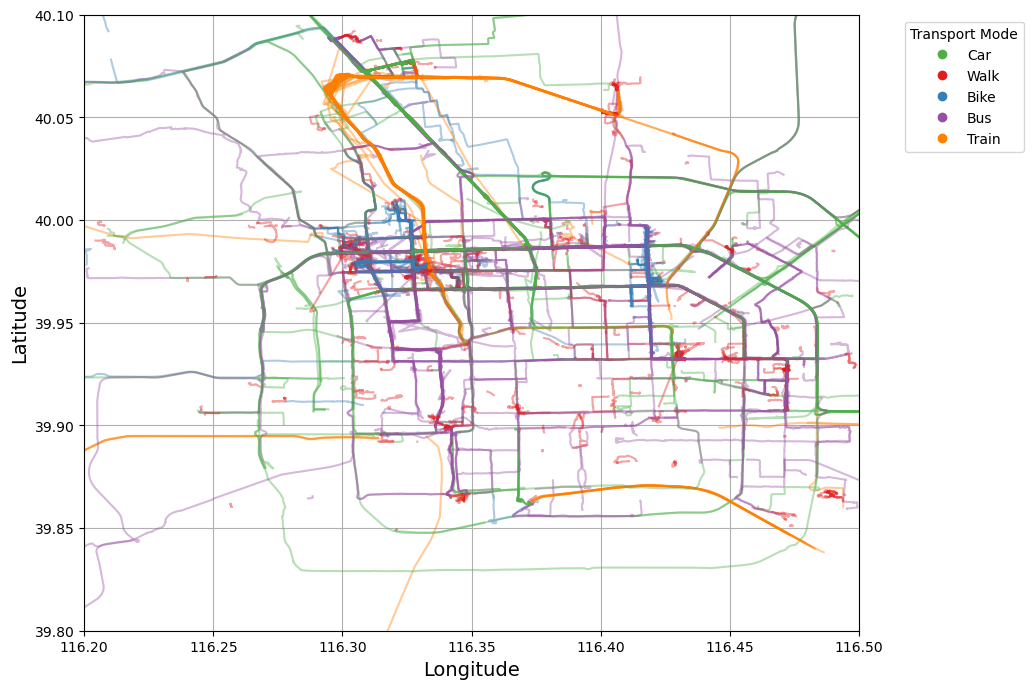

In [112]:
# Define an improved color map with distinct, visually appealing colors
# Get Seaborn's Set2 palette (8 colors)
color_palette = sns.color_palette("Set1", 8)

# Assign transport modes to colors
color_map = {
    'walk': color_palette[0],   # Soft Green
    'bike': color_palette[1],   # Light Orange
    'car': color_palette[2],    # Light Blue
    'bus': color_palette[3],    # Light Purple
    'train': color_palette[4],  # Teal
    '0': color_palette[5]         # Default for missing labels
}
plt.figure(figsize=(10, 8))
#plt.title("Geolife Trajectories by Transport Mode", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.xlim(116.2, 116.5)  # Longitude limits
plt.ylim(39.8, 40.1)  # Latitude limits

# Track unique transport modes for legend
unique_labels = set()

# Iterate over each segment and plot it with the corresponding color
for name, group in segments:
    transport_mode = group['predicted_label'].iloc[0]  # Take the first label for the segment
    color = color_map.get(transport_mode, 'black')  # Default to black if label is unknown
    plt.plot(group['lon'], group['lat'],color=color, alpha=0.4)
    unique_labels.add(transport_mode)  # Collect unique transport modes for legend

# Create a custom legend with label replacements
handles = []
labels = []
for label in unique_labels:
    # Replace '0' with "Unlabeled" in legend
    display_label = "Unlabeled" if str(label) == '0' else str(label).capitalize()
    handles.append(plt.Line2D([0], [0], 
                    color=color_map.get(str(label), 'gray'), 
                    lw=2,
                    marker='o',
                    linestyle='None'))
    labels.append(display_label)

plt.legend(handles, labels, 
           title="Transport Mode", 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           fontsize=10)

#plt.tight_layout()
plt.grid()

# Save the plot
plt.savefig("Graphs/xgboost_test_predicted_label.png", dpi=500, bbox_inches="tight")
#plt.savefig(save_path, dpi=600, format="png", bbox_inches="tight", transparent=True)
# Show the plot
plt.show()

Plot single trajectories

In [23]:
# Take the first 10,000 rows
test_df_first_10000 = test_df.head(10000)

# Save to CSV
test_df_first_10000.to_csv('compared test_df.csv', index=False)  # `index=False` avoids saving row numbers

In [124]:
new_df = df[df['segment']==16817]

/var/folders/6q/9kdss80974ldrx7hy_83wyn00000gn/T/ipykernel_1112/1339550229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['x'], new_df['y'] = transformer.transform(


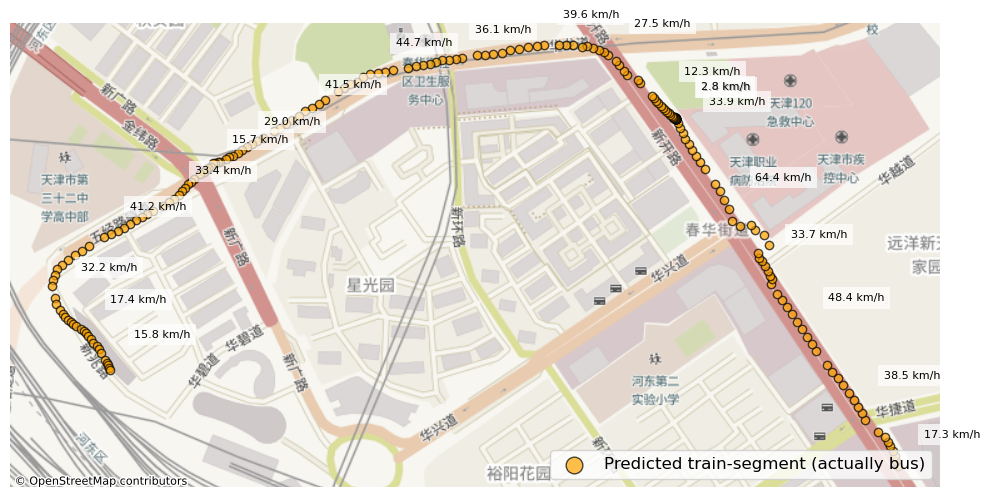

In [ ]:
color_palette = sns.color_palette("Set1", 8)

# Convert coordinates
transformer = Transformer.from_crs('EPSG:4326', 'EPSG:3857', always_xy=True)
new_df['x'], new_df['y'] = transformer.transform(
    new_df['lon'].values, 
    new_df['lat'].values
)

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Assign colors and labels
colors = {16817: 'orange'}
labels = {16817: 'Predicted train-segment (actually bus)'}

# Plot data - ensure column name matches your DataFrame
for segment, group in new_df.groupby('segment'):  
    ax.scatter(
        group['x'], 
        group['y'], 
        color=colors[segment], 
        label=labels[segment],
        alpha=0.7, 
        edgecolor='k',
        zorder=2  # Ensure points appear above basemap
    )

x_offset = 50  
y_offset = 50  
for i in range(0, len(new_df), 10):
    row = new_df.iloc[i]
    label_x = row['x'] + x_offset
    label_y = row['y'] + y_offset

    ax.text(
        label_x,  # Use the offset x-coordinate
        label_y,  # Use the offset y-coordinate
        f"{row['speed']:.1f} km/h",
        fontsize=8,

        ha='left',
        va='bottom',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
        zorder=3 # Ensure labels are above points if needed
    )

# Add basemap
ctx.add_basemap(
    ax,
    url="https://tile.openstreetmap.org/{z}/{x}/{y}.png",
    attribution="© OpenStreetMap contributors",
    zorder=1  # Place basemap below points
)

# Customize plot bounds
x_min, x_max = new_df['x'].min(), new_df['x'].max()
y_min, y_max = new_df['y'].min(), new_df['y'].max()

x_pad = (x_max - x_min) * 0.1
y_pad = (y_max - y_min) * 20

#ax.set_xlim(x_min - x_pad, x_max + x_pad)
#ax.set_ylim(y_min - y_pad, y_max + y_pad)

# Final adjustments
ax.set_aspect('equal')
ax.set_axis_off()

plt.legend(
    #title='Trajectory segments',
    loc='lower right',
    fontsize=12,
    title_fontsize=14,
    markerscale=2,
    frameon=True,
    framealpha=0.8
)

plt.savefig("Graphs/XGB_single_preicted", dpi=500, bbox_inches="tight")
plt.show()

Feature importance

In [22]:
# Get raw importance scores
top_features = best_xgb_model.get_booster().get_score(importance_type='weight')

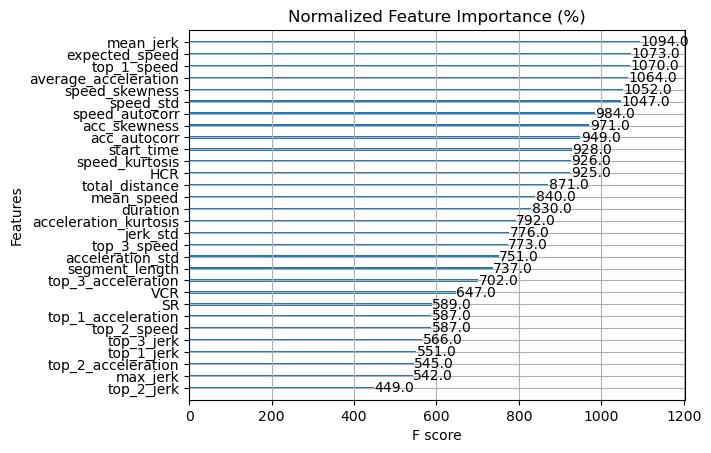

In [23]:
# Get raw importance scores
importance = best_xgb_model.get_booster().get_score(importance_type='weight')

# Plot
xgb.plot_importance(importance, title='Normalized Feature Importance (%)')
plt.show()

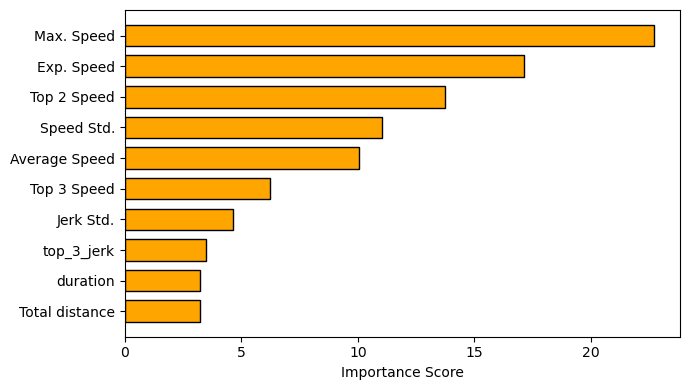

In [24]:
# Get feature importance scores from XGBoost (GAIN-based importance)
importance = best_xgb_model.get_booster().get_score(importance_type='gain')

# Create DataFrame
fi_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

# Sort and get top features
top_features = fi_df.nlargest(10, 'Importance').sort_values('Importance', ascending=True)

# Plot using RF style 
plt.figure(figsize=(7, 4))

custom_labels = {
    'top_1_speed': 'Max. Speed',
    'speed_std': 'Speed Std.',
    'expected_speed': 'Exp. Speed',
    'mean_speed': 'Average Speed',
    'trajectory_length': 'Segment length',
    'total_distance': 'Total distance',
    'jerk_std': 'Jerk Std.',
    'acceleration_std': 'Acceleration Std.',
    'acceleration_kurtosis': 'Acceleration Kurtosis',
    'speed_skewness': 'Speed Skewness',
    'top_3_speed': 'Top 3 Speed',
    'top_2_speed': 'Top 2 Speed',
    'acc_autocorr': 'Acceleration Autocorr.',
    'top_1_acceleration': 'Max. Acceleration',
    'speed_kurtosis': 'Speed Kurtosis',
    'speed_autocorr': 'Speed Autocorr.',
    'mean_jerk': 'Average Jerk',
    'acc_skewness': 'Acceleration Skewness',
    'average_acceleration': 'Average Acceleration',
}

# Apply custom labels
top_features['pretty_label'] = top_features['Feature'].map(lambda x: custom_labels.get(x, x))


plt.barh(
    top_features['pretty_label'],
    top_features['Importance'],
    color='orange',
    edgecolor='black',
    height=0.7
)

# Keep all borders/box (don't disable spines)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Add these lines to match RF box style
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')

plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('Graphs/xgb_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Predict the unlabeled data

First, predict the unlabeled data

In [24]:
unlabeled_df = pd.read_pickle("updated_df_fifteen.pkl")

In [25]:
unlabelled_feature_df = feature_extraction.extract_features(unlabeled_df, 'new_segment')

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [26]:
unlabeled_X = unlabelled_feature_df.drop(columns=['label', 'trajectory',  'segment'])

In [27]:
unlabelled_predicted = best_xgb_model.predict(unlabeled_X)

# Predict probabilities for unlabeled data
unlabeled_probs = best_xgb_model.predict_proba(unlabeled_X)  # Shape: [n_samples, n_classes]

In [28]:
unlabelled_feature_df['confidence'] = np.max(unlabeled_probs, axis=1)
unlabelled_feature_df['label'] = unlabelled_predicted

See the predictions made by the model

In [29]:
prediction_counts = unlabelled_feature_df['label'].value_counts()
print(prediction_counts)

label
1    60375
3    46459
2    39654
4    39232
0    13978
Name: count, dtype: int64


Match the new labels to the full dataset for plotting

In [30]:
# First, create a mapping dictionary from segment to label from unlabelled_feature_df
segment_label_map = unlabelled_feature_df.set_index('segment')['label'].to_dict()

# Then map the labels to unlabeled_df using the new_segment column
unlabeled_df['label'] = unlabeled_df['new_segment'].map(segment_label_map)

# Fill any NaN values (unmatched segments) with 10
unlabeled_df['label'] = unlabeled_df['label'].fillna(10).astype(int)  # Convert to int if needed

In [50]:
unlabeled_df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,index,...,speed,time_diff,acceleration,jerk,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,new_segment
0,39.974426,116.399735,491.0,39816.056782,2009-01-03 01:21:46,20090103012134.plt,3,135,1.0,7,...,5.026005,4.0,-0.330732,3.316419,314.179106,102.698082,0.263217,25.674520,5.530613,1
1,39.974458,116.399700,491.0,39816.056840,2009-01-03 01:21:51,20090103012134.plt,3,135,1.0,8,...,3.342841,5.0,-0.336633,-0.001180,320.031126,5.852020,0.503513,1.170404,-4.900823,1
2,39.974491,116.399732,490.0,39816.056898,2009-01-03 01:21:56,20090103012134.plt,3,135,1.0,9,...,3.291597,5.0,-0.010249,0.065277,36.616347,76.585221,0.015568,15.317044,2.829328,1
3,39.974530,116.399758,489.0,39816.056956,2009-01-03 01:22:01,20090103012134.plt,3,135,1.0,10,...,3.506231,5.0,0.042927,0.010635,27.061885,9.554462,0.061215,1.910892,-2.681230,1
4,39.974577,116.399745,490.0,39816.056991,2009-01-03 01:22:04,20090103012134.plt,3,135,1.0,11,...,6.410728,3.0,0.968166,0.308413,348.032515,39.029370,0.453068,13.009790,3.699632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13478904,44.633498,129.063237,1191.0,39299.336343,2007-08-05 08:04:20,20070805070503.plt,3,10,24149.6,14999996,...,91.844368,1.0,0.650083,0.365922,330.656356,2.912336,0.007078,2.912336,2.251269,201111
13478905,44.633918,129.062910,1191.0,39299.336366,2007-08-05 08:04:22,20070805070503.plt,3,10,24149.6,14999997,...,96.103285,2.0,2.129458,0.739688,331.011846,0.355490,0.044316,0.177745,-1.367295,201111
13478906,44.634127,129.062783,1191.0,39299.336377,2007-08-05 08:04:23,20070805070503.plt,3,10,24149.6,14999998,...,91.149788,1.0,-4.953497,-7.082955,336.615756,5.603910,0.054345,5.603910,5.426165,201111
13478907,44.634515,129.062502,1191.0,39299.336400,2007-08-05 08:04:25,20070805070503.plt,3,10,24149.6,14999999,...,87.364980,2.0,-1.892404,1.530547,332.735166,3.880590,0.043322,1.940295,-1.831807,201111


predictions to cs

In [32]:
# Assuming your DataFrame is called 'df'
XGB_preds = unlabelled_feature_df.head(10000)

# Save to CSV
XGB_preds.to_csv('XGB_preds.csv', index=False)

Plot

In [ ]:
def filter_entire_trajectories(
    df: pd.DataFrame,
    max_speed_kmh: float = 200,
    max_distance_km: float = 1,
    segment_col: str = 'new_segment'
) 
    # Input validation
    if 'speed' not in df.columns or 'distance' not in df.columns:
        raise ValueError("DataFrame must contain 'speed' and 'distance' columns")
    
    if segment_col not in df.columns:
        raise ValueError(f"Segment column '{segment_col}' not found in DataFrame")

    # Convert speed threshold from km/h to km/s
    threshold_km_per_sec = max_speed_kmh 

    # Identify segments with any violations
    violation_mask = (
        (df['speed'] > threshold_km_per_sec) |
        (df['distance'] > max_distance_km)
    )
    
    # Get list of bad segments with ANY violations
    bad_segments = df.loc[violation_mask, segment_col].unique()
    
    # Filter out all points from bad segments
    clean_df = df[~df[segment_col].isin(bad_segments)].copy()
    
    return clean_df.reset_index(drop=True)

In [58]:
unlabeled__df2 = filter_entire_trajectories(unlabeled_df)

In [59]:
unlabeled__df2 = unlabeled__df2[unlabeled__df2['label'] != 10]

In [60]:
unlabeled__df2['label'] = encoder.inverse_transform(unlabeled__df2['label'])

In [61]:
segment = unlabeled__df2.groupby('new_segment')

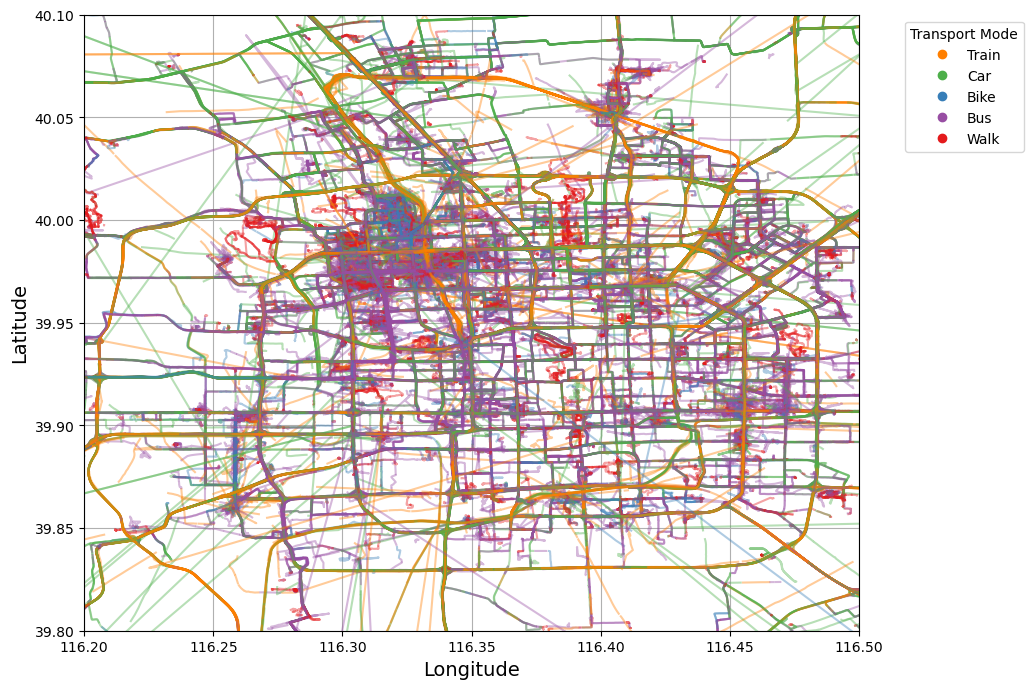

In [ ]:
# Define an improved color map with distinct, visually appealing colors
# Get Seaborn's Set2 palette (8 colors)
color_palette = sns.color_palette("Set1", 8)

# Assign transport modes to colors
color_map = {
    'walk': color_palette[0],   # Soft Green
    'bike': color_palette[1],   # Light Orange
    'car': color_palette[2],    # Light Blue
    'bus': color_palette[3],    # Light Purple
    'train': color_palette[4],  # Teal
    '0': color_palette[5]         # Default for missing labels
}
plt.figure(figsize=(10, 8))
#plt.title("Geolife Trajectories by Transport Mode", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.xlim(116.2, 116.5)  # Longitude limits
plt.ylim(39.8, 40.1)  # Latitude limits

# Track unique transport modes for legend
unique_labels = set()

# Iterate over each segment and plot it with the corresponding color
for name, group in segment:
    transport_mode = group['label'].iloc[0]  
    color = color_map.get(transport_mode, 'black')  
    plt.plot(group['lon'], group['lat'],color=color, alpha=0.4)
    unique_labels.add(transport_mode)  # Collect unique transport modes for legend

# Create a custom legend with label replacements
handles = []
labels = []
for label in unique_labels:
    # Replace '0' with "Unlabeled" in legend
    display_label = "Unlabeled" if str(label) == '0' else str(label).capitalize()
    handles.append(plt.Line2D([0], [0], 
                    color=color_map.get(str(label), 'gray'), 
                    lw=2,
                    marker='o',
                    linestyle='None'))
    labels.append(display_label)

plt.legend(handles, labels, 
           title="Transport Mode", 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           fontsize=10)

#plt.tight_layout()
plt.grid()

# Save the plot
plt.savefig("Graphs/xgboost_unlabeled_predicted.png", dpi=500, bbox_inches="tight")
#plt.savefig(save_path, dpi=600, format="png", bbox_inches="tight", transparent=True)
# Show the plot
plt.show()

# Train the new (balanced) model

In [33]:
# Filter low-confidence rows
unlabelled_feature_df = unlabelled_feature_df[unlabelled_feature_df['confidence'] >= 0.9]

In [32]:
unlabelled_feature_df

,label,segment,trajectory,start_time,segment_length,total_distance,duration,mean_speed,expected_speed,top_1_speed,...,HCR,SR,VCR,speed_skewness,acc_skewness,speed_kurtosis,acceleration_kurtosis,speed_autocorr,acc_autocorr,confidence
new_segment,,,,,,,,,,,,,,,,,,,,,
3,4,3,20090103012134.plt,5,51,0.218531,0.058056,3.764162,4.799914,19.131029,...,0.568627,0.215686,0.039216,1.285393,4.963819,1.828824,31.695985,0.476250,-0.210557,0.984988
8,4,8,20090103012134.plt,2,77,0.132455,0.104444,1.268183,1.302061,6.678746,...,0.506494,0.675325,0.064935,1.688060,2.035858,2.499369,12.845845,0.535944,-0.242195,0.959056
9,4,9,20090103012134.plt,2,170,0.507882,0.391111,1.298563,2.634438,10.561005,...,0.588235,0.423529,0.105882,1.161675,1.841691,0.404976,7.090414,0.591578,-0.293445,0.969277
11,4,11,20090103012134.plt,3,183,0.786810,0.208889,3.766645,4.539433,21.436659,...,0.508197,0.114754,0.065574,1.555307,5.317387,4.604518,40.691139,0.514845,-0.192226,0.989862
13,4,13,20090103012134.plt,4,166,0.402823,0.461389,0.873066,1.922826,11.146569,...,0.674699,0.512048,0.090361,1.765786,4.027982,3.478730,26.365608,0.479957,-0.167853,0.978327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201080,3,201080,20090227210324.plt,21,102,2.106695,0.031667,66.527201,66.160232,73.626891,...,0.000000,0.000000,0.000000,-1.675786,-4.627743,2.419971,36.498716,0.937813,0.024419,0.929661
201087,1,201087,20090227210324.plt,21,17,0.103225,0.005556,18.580423,18.371323,42.633242,...,0.117647,0.294118,0.000000,0.086495,0.533650,-1.619268,-0.249585,0.988095,0.264099,0.933520
201099,4,201099,20070805070503.plt,7,37,0.075005,0.148056,0.506598,3.250558,13.096031,...,0.783784,0.378378,0.081081,1.342894,0.917529,1.102384,3.273791,0.116946,-0.390984,0.969421


Drop rows with unrealistic means

In [34]:
speed_thresholds = {
    'walking': 25,
    'bicycle': 60,
    'car': 200,
    'train': 300,
    'bus': 200
}

In [35]:
# Drop rows where average_speed exceeds the mode-specific threshold
df_filtered = unlabelled_feature_df[unlabelled_feature_df.apply(
    lambda row: row['mean_speed'] <= speed_thresholds.get(row['label'], float('inf')),
    axis=1
)]

none get filtered out

Balance the dataset!

In [36]:
label_counts = train_df['label'].value_counts()

In [37]:
label_counts

label
4    4839
1    2090
2    1698
0    1513
3     980
Name: count, dtype: int64

In [38]:
label_counts = unlabelled_feature_df['label'].value_counts()
label_counts

label
4    21218
3     6896
1     3577
0     2594
2     2266
Name: count, dtype: int64

In [ ]:
import pandas as pd


desired_counts = {
    0: None,  # Include all rows with label 0
    1: 2901,
    2: None,
    3: 3986,
    4: 198
}

# Initialize an empty list to store the filtered DataFrames
filtered_dfs = []

# Loop through each label and its desired count
for label, count in desired_counts.items():
    if count is None:
        # Include all rows with this label
        filtered_dfs.append(unlabelled_feature_df[unlabelled_feature_df['label'] == label])
    else:
        # Randomly sample the desired number of rows for this label
        filtered_dfs.append(unlabelled_feature_df[unlabelled_feature_df['label'] == label].sample(n=count, random_state=36))

# Concatenate the filtered DataFrames
filtered_unlabelled_df = pd.concat(filtered_dfs, ignore_index=True)

# Display the counts of each label in the filtered DataFrame to verify
print(filtered_unlabelled_df['label'].value_counts())

label
3    3986
1    2901
0    2594
2    2266
4     198
Name: count, dtype: int64


In [40]:
# Concatenate the filtered DataFrames into a single DataFrame
filtered_unlabelled_df = pd.concat(filtered_dfs, ignore_index=True)

In [41]:
filtered_unlabelled_df

,label,segment,trajectory,start_time,segment_length,total_distance,duration,mean_speed,expected_speed,top_1_speed,...,HCR,SR,VCR,speed_skewness,acc_skewness,speed_kurtosis,acceleration_kurtosis,speed_autocorr,acc_autocorr,confidence
0,0,79,20090101024458.plt,2,68,0.450783,0.053056,8.496433,11.101221,42.352086,...,0.500000,0.000000,0.029412,1.944041,2.869425,4.170144,10.417946,0.150504,-0.310759,0.916134
1,0,1371,20071224114437.plt,12,97,1.014267,0.080556,12.590899,12.456060,35.218618,...,0.175258,0.000000,0.000000,2.204031,0.916683,11.501361,8.501955,0.541364,-0.233404,0.908946
2,0,1404,20081003074628.plt,8,109,1.696101,0.185278,9.154367,9.644343,34.118043,...,0.495413,0.000000,0.009174,1.969328,0.464584,7.885600,12.698544,0.274723,-0.359814,0.940708
3,0,1578,20080103120703.plt,12,67,1.167061,0.121389,9.614230,11.243402,15.718026,...,0.164179,0.014925,0.014925,-2.226437,1.409934,8.544175,6.786103,0.581504,-0.190906,0.937227
4,0,1580,20080103120703.plt,13,67,1.609167,0.218056,7.379619,10.340051,45.848548,...,0.388060,0.000000,0.000000,3.590185,0.811957,16.908273,12.259556,0.229000,-0.512278,0.908410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11940,4,180910,20090415052136.plt,8,162,1.064332,0.255556,4.164778,4.252510,24.504191,...,0.475309,0.030864,0.012346,3.885486,3.393767,24.611993,27.882398,0.510827,-0.249683,0.982182
11941,4,69253,20081016014005.plt,3,22,0.011938,0.013889,0.859530,0.941911,7.211955,...,0.636364,0.727273,0.000000,3.208202,2.246097,11.383521,7.161600,0.880843,0.374836,0.933904
11942,4,111498,20080920182834.plt,0,168,0.463595,0.231667,2.001128,2.063417,12.735408,...,0.660714,0.375000,0.059524,2.547574,1.313806,8.469043,7.821203,0.577725,-0.254218,0.963915
11943,4,111160,20080907031053.plt,8,112,0.015019,0.195833,0.076690,0.088403,0.436336,...,0.633929,1.000000,0.000000,3.197616,-0.880010,14.684258,7.952761,0.541881,-0.153766,0.967061


In [42]:
merged_train_df = pd.concat([train_df, filtered_unlabelled_df])

In [43]:
label_counts = merged_train_df['label'].value_counts()
label_counts

label
4    5037
1    4991
3    4966
0    4107
2    3964
Name: count, dtype: int64

In [44]:
# Separate features and target for the training set
X_train_merged = merged_train_df.drop(columns=['label','trajectory','segment', 'confidence'], axis=1)
y_train_merged = merged_train_df['label']

Train XGBoost on the new data

In [45]:
# Perform GridSearchCV
grid_search.fit(X_train_merged, y_train_merged)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=80, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total tim

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_class=5,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [5, 6, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [80, 100, 120],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [46]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 120, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9104764580507392


In [47]:
y_test

segment
13550    4
931      0
17150    2
122      2
14494    1
        ..
1988     4
13951    2
1691     2
154      2
20115    2
Name: label, Length: 2781, dtype: int64

In [50]:
#y_test = encoder.transform(y_test)

best_params = grid_search.best_params_

best_xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",  
    num_class=5,  
    eval_metric="mlogloss",  
    use_label_encoder=False,
    random_state=36,
    **best_params  # Use best hyperparameters
)

best_xgb_model.fit(X_train_merged, y_train_merged)

# Predictions
y_pred = best_xgb_model.predict(X_test)


# Decode labels back to original transport mode names
y_test = encoder.inverse_transform(y_test)
y_pred = encoder.inverse_transform(y_pred)

# Evaluate model
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:15:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final Accuracy: 0.839626033800791
Classification Report:
               precision    recall  f1-score   support

        bike      0.878     0.842     0.860       386
         bus      0.770     0.696     0.731       543
         car      0.736     0.677     0.705       412
       train      0.907     0.697     0.788       267
        walk      0.874     0.995     0.930      1173

    accuracy                          0.840      2781
   macro avg      0.833     0.781     0.803      2781
weighted avg      0.837     0.840     0.835      2781

Confusion Matrix:
 [[ 325   20    7    0   34]
 [  23  378   73   12   57]
 [  17   68  279    7   41]
 [   2   24   18  186   37]
 [   3    1    2    0 1167]]



Confusion Matrix (% of True Labels):


,Pred bike,Pred bus,Pred car,Pred train,Pred walk
True bike,84.2%,5.2%,1.8%,0.0%,8.8%
True bus,4.2%,69.6%,13.4%,2.2%,10.5%
True car,4.1%,16.5%,67.7%,1.7%,10.0%
True train,0.7%,9.0%,6.7%,69.7%,13.9%
True walk,0.3%,0.1%,0.2%,0.0%,99.5%


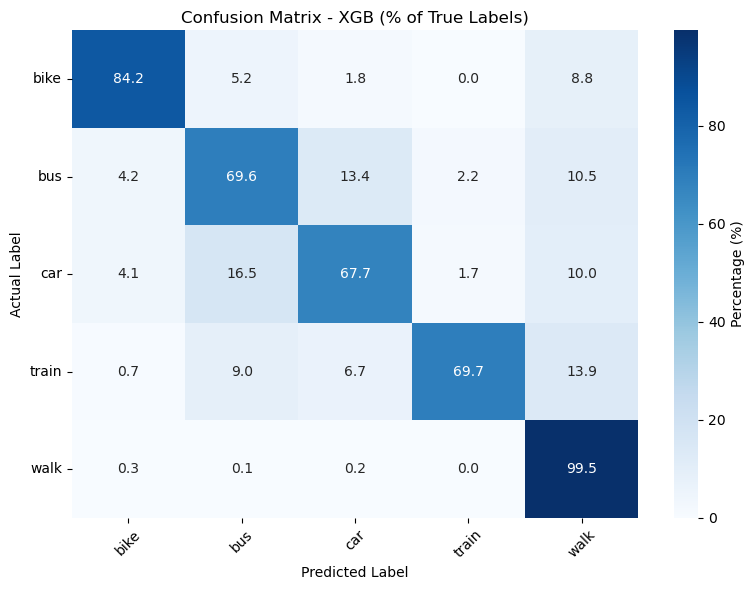

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Normalize by true labels

# Create labeled DataFrame
class_names = encoder.classes_
cm_df = pd.DataFrame(cm_percent, 
                    index=[f"True {name}" for name in class_names],
                    columns=[f"Pred {name}" for name in class_names])

print("\nConfusion Matrix (% of True Labels):")
display(cm_df.style.format("{:.1f}%").set_caption("Confusion Matrix (Percentage of True Labels)"))

# Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="Blues",
           xticklabels=class_names, yticklabels=class_names,
           cbar_kws={'label': 'Percentage (%)'})
plt.title("Confusion Matrix - XGB (% of True Labels)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("XGB_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()